<a href="https://colab.research.google.com/github/S-Ochoki/wizeline_tennis_atp/blob/master/use_case_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import csv
import sqlite3
import subprocess as sp
import pandas as pd

In [6]:
os.chdir(os.getenv('HOME'))

My folder structure is as follows:
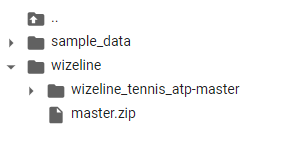

In [8]:
os.chdir('/content/wizeline/')

In [9]:
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /content/wizeline


In [10]:
# After ensuring i'm in the right place, I unzip master.zip
sp.run(["unzip", "master.zip"], check=True)

CompletedProcess(args=['unzip', 'master.zip'], returncode=0)

In [11]:
os.chdir('wizeline_tennis_atp-master')

In [ ]:
folder_contents = os.listdir(os.getcwd())

# Create a list of files in the unzipped folder
file_list = [item for item in folder_contents if os.path.isfile(os.path.join(os.getcwd(), item))]

In [28]:
def get_files_df(files_list, pattern, fields_of_interest):
    '''
      This function creates a dataframe populated with all data in the files that match a specific pattern.
      Currently the function ignores files with doubles matches
    '''

    matches_df = pd.DataFrame()
    df_container = list()

    for file in files_list:
      if file.startswith(pattern):
        df = pd.read_csv(file, index_col=None, header=0)
        if all(column in df.columns for column in fields_of_interest):
          df = df[fields_of_interest]
          df['file_processed'] = file
          df['date_time_processed'] = pd.Timestamp.now()
          df_container.append(df)

    matches_df = pd.concat(df_container)

    return matches_df

In [29]:
# Use case requirements

fields_of_interest = ['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date',
                      'match_num', 'winner_id', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age']

pattern = 'atp_matches_'

In [30]:
atp_matches_df = get_files_df(file_list, pattern, fields_of_interest)
atp_matches_df.info()

<ipython-input-28-e78353e481ea>:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, index_col=None, header=0)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 896528 entries, 0 to 16634
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   tourney_id           896528 non-null  object        
 1   tourney_name         896528 non-null  object        
 2   surface              891952 non-null  object        
 3   draw_size            895693 non-null  object        
 4   tourney_level        896528 non-null  object        
 5   tourney_date         896528 non-null  int64         
 6   match_num            896528 non-null  int64         
 7   winner_id            896528 non-null  int64         
 8   winner_name          896528 non-null  object        
 9   winner_hand          876961 non-null  object        
 10  winner_ht            546724 non-null  float64       
 11  winner_ioc           896520 non-null  object        
 12  winner_age           883352 non-null  float64       
 13  file_processed 

In [31]:
# Database and table creation using data from atp_matches_df dataframe
database = 'tennis_atp.db'
conn = sqlite3.connect(database)
cur = conn.cursor()

atp_matches_df.to_sql('atp_matches', conn, if_exists="replace", index=False)

conn.close()

A quick check of the new database and atp_matches table shows expected results

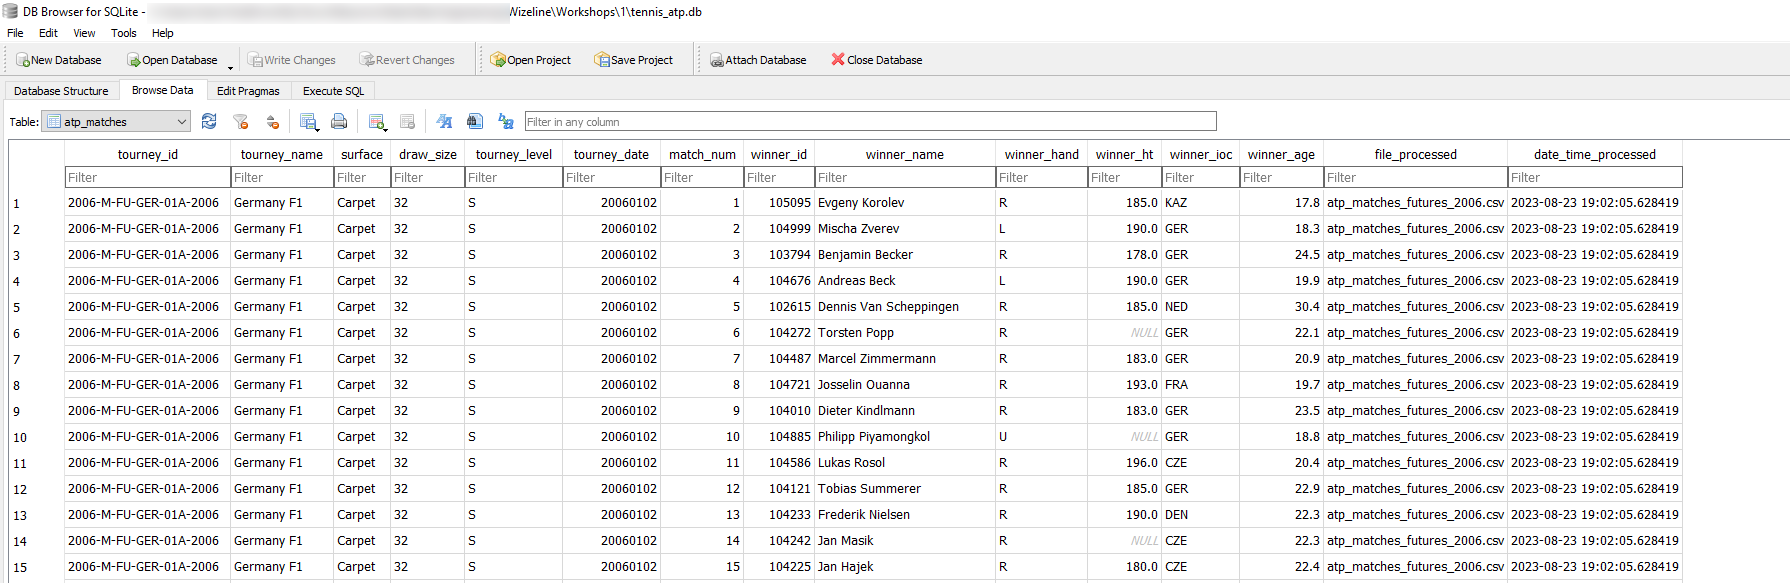